In [2]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

# POMDP Toy Problem

Symmetric 3 state, 2 action model

## Model definition

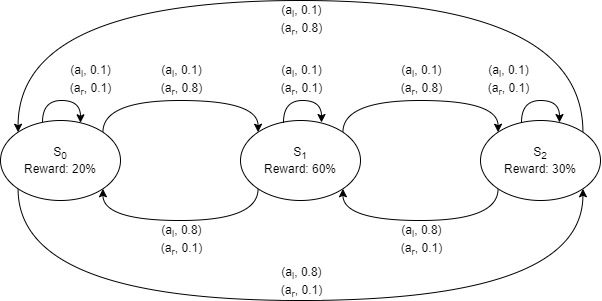

In [3]:
ACTION_COUNT = 2
STATE_COUNT = 3

In [4]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + (-1 if a == 0 else 1)) % STATE_COUNT # Left and right movement
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.1, 0.1, 0.8],
       [0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1]])

In [5]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7 , 0.15, 0.15],
       [0.15, 0.7 , 0.15],
       [0.15, 0.15, 0.7 ]])

In [6]:
REWARD_PROBS = [0.2, 0.6, 0.3]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p] = REWARD_PROBS[s_p]
        
reward_table

array([[[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]],

       [[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]],

       [[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]]])

In [7]:
states = ['s0','s1','s2']
actions = ['left', 'right']
observations = ['s0', 's1', 's2']

model = Model(states, actions, observations, transition_table, reward_table, observation_table, probabilistic_rewards=True)

## Solving

In [8]:
solver = PBVI_Solver(8,4)

In [9]:
value_function, solve_history = solver.solve(model)

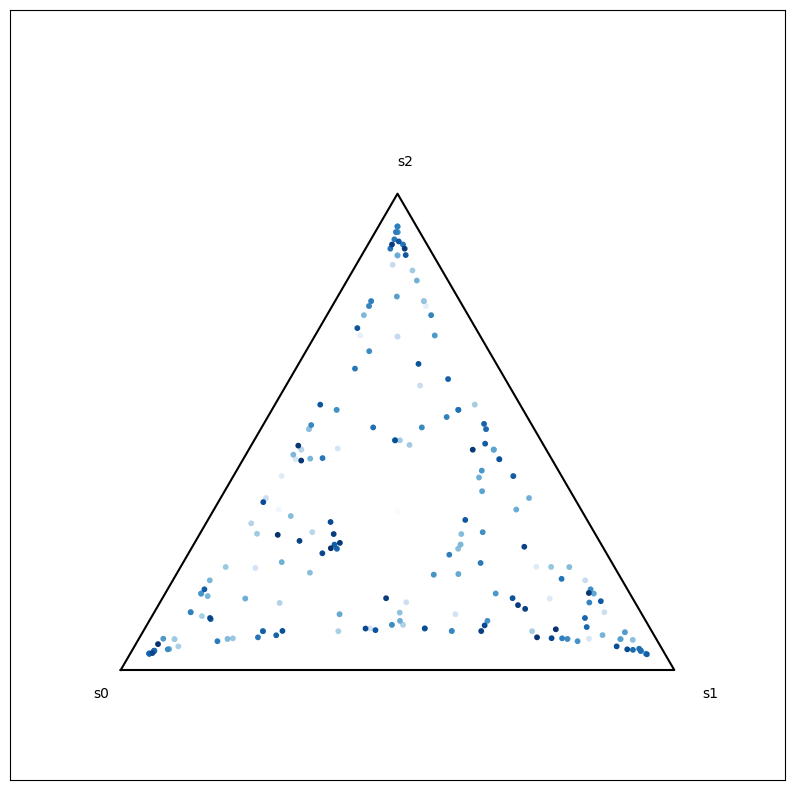

In [10]:
solve_history.plot_belief_set(10)

In [11]:
value_function

[AlphaVector([3.86606556, 3.81766635, 4.01916861]),
 AlphaVector([3.9873211 , 3.88386927, 3.80281666]),
 AlphaVector([4.02468273, 3.85786898, 3.81377978]),
 AlphaVector([3.85782911, 3.81345027, 4.02473125]),
 AlphaVector([3.85786898, 3.81377978, 4.02468273]),
 AlphaVector([4.01915359, 3.86629195, 3.8173662 ]),
 AlphaVector([3.97460679, 3.89566063, 3.72451022]),
 AlphaVector([4.01987757, 3.86617788, 3.81507272]),
 AlphaVector([4.02408999, 3.85787961, 3.81600197]),
 AlphaVector([3.85566927, 3.81659296, 4.02407068]),
 AlphaVector([4.02473125, 3.85782911, 3.81345027]),
 AlphaVector([3.98705106, 3.88386382, 3.80302282]),
 AlphaVector([3.85777092, 3.81339036, 4.02473673]),
 AlphaVector([4.0194975 , 3.86571419, 3.81757144]),
 AlphaVector([3.97460551, 3.89566067, 3.72451088]),
 AlphaVector([3.85806713, 3.81342088, 4.02469124]),
 AlphaVector([4.02473673, 3.85777092, 3.81339036]),
 AlphaVector([3.85786632, 3.81377714, 4.02468356]),
 AlphaVector([3.86591584, 3.8150666 , 4.02007837]),
 AlphaVector

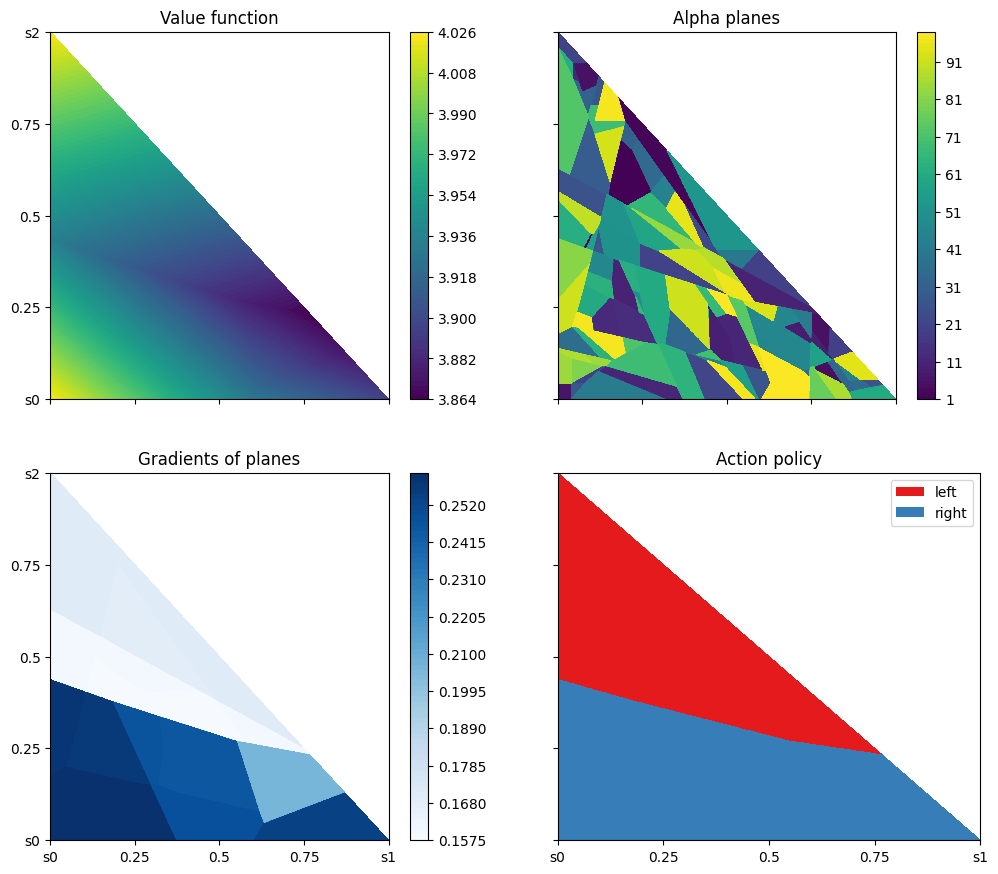

In [12]:
solve_history.plot_solution(3, plot_belief=False)

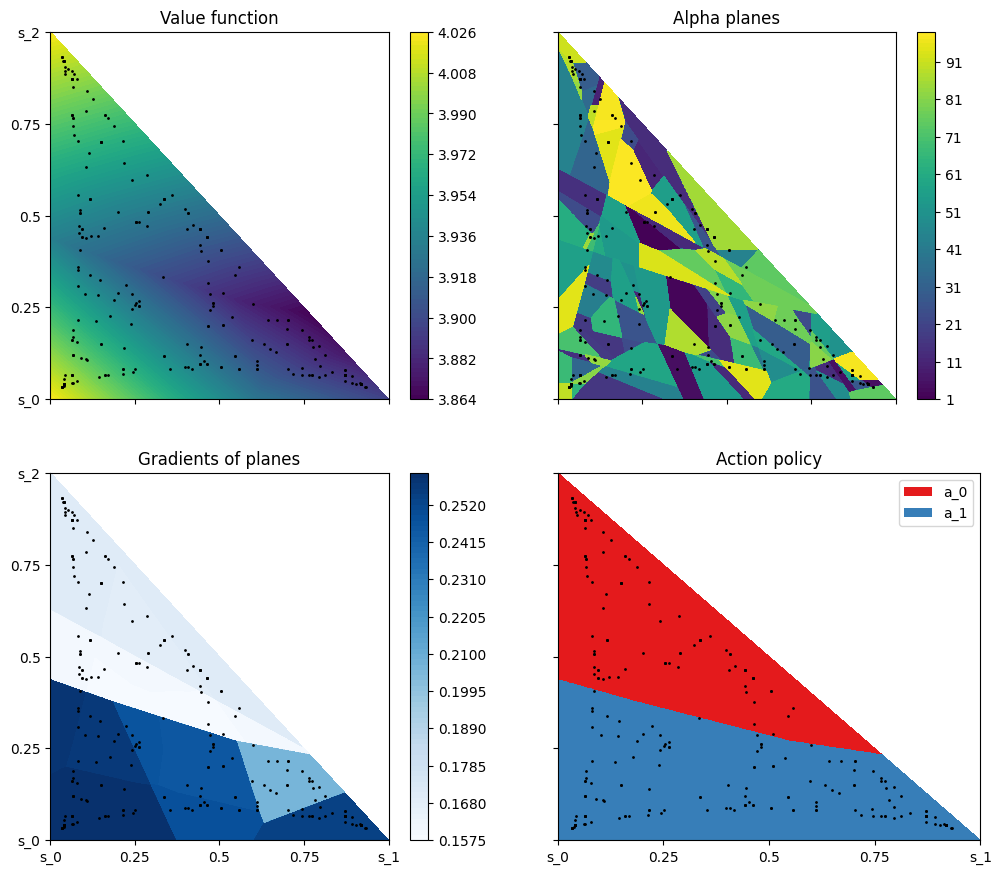

In [13]:
value_function.plot(3, belief_set=solve_history.explored_beliefs)